<a href="https://colab.research.google.com/github/amhamhamh/Python_NLP/blob/main/NLTK_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC_%EC%93%B0%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# ntlk(자연어 처리) 패키지 말뭉치 불러내기
import nltk
nltk.download("book", quiet=True)
from nltk.book import *

In [16]:
# 저작권이 만료된 gutenberg 말뭉치 샘플
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [18]:
# austen의 문서 원문 불러내기
persuasion = nltk.corpus.gutenberg.raw('austen-persuasion.txt')
print(persuasion[:1000])

[Persuasion by Jane Austen 1818]


Chapter 1


Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,
for his own amusement, never took up any book but the Baronetage;
there he found occupation for an idle hour, and consolation in a
distressed one; there his faculties were roused into admiration and
respect, by contemplating the limited remnant of the earliest patents;
there any unwelcome sensations, arising from domestic affairs
changed naturally into pity and contempt as he turned over
the almost endless creations of the last century; and there,
if every other leaf were powerless, he could read his own history
with an interest which never failed.  This was the page at which
the favourite volume always opened:

           "ELLIOT OF KELLYNCH HALL.

"Walter Elliot, born March 1, 1760, married, July 15, 1784, Elizabeth,
daughter of James Stevenson, Esq. of South Park, in the county of
Gloucester, by which lady (who died 1800) he has issue Elizabeth,
born June 1, 1785; Ann

In [33]:
# 토큰으로 분리하여 문자열 리스트로 출력
from nltk.tokenize import sent_tokenize
print(sent_tokenize(persuasion[:1000])[0])

[Persuasion by Jane Austen 1818]


Chapter 1


Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,
for his own amusement, never took up any book but the Baronetage;
there he found occupation for an idle hour, and consolation in a
distressed one; there his faculties were roused into admiration and
respect, by contemplating the limited remnant of the earliest patents;
there any unwelcome sensations, arising from domestic affairs
changed naturally into pity and contempt as he turned over
the almost endless creations of the last century; and there,
if every other leaf were powerless, he could read his own history
with an interest which never failed.


In [30]:
# 단어별 tokenize
from nltk.tokenize import word_tokenize
word_tokenize(persuasion[50:100])

['Walter', 'Elliot', ',', 'of', 'Kellynch', 'Hall', ',', 'in', 'Somersetshire']

In [34]:
# 쉼표 등의 필요없는 것들 삭제하기
from nltk.tokenize import RegexpTokenizer
# 단어인거만 추출(정규식)
retokenize = RegexpTokenizer("[\w]+")
retokenize.tokenize(persuasion[50:100])

['Walter', 'Elliot', 'of', 'Kellynch', 'Hall', 'in', 'Somersetshire']

In [41]:
# 단어의 접미사나 어미를 제거하여 형태소의 기본 찾기 

from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words =  ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer : ", [st1.stem(w) for w in words])
print("Lancaster Stemmer : ", [st1.stem(w) for w in words])

Porter Stemmer :  ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer :  ['fli', 'fli', 'fli', 'flew', 'flown']


In [44]:
# 단어의 원형 찾아내기 

import nltk
nltk.download('omw-1.4')  

from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos="v") for w in words]

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['fly', 'fly', 'fly', 'fly', 'fly']

In [45]:
# 품사별 설명(동사)
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [46]:
# 품사별로 형태소 단위 나누기 

'''
NNP: 단수 고유명사
VB: 동사
VBP: 동사 현재형
TO: to 전치사
NN: 명사(단수형 혹은 집합형)
DT: 관형사
'''

from nltk.tag import pos_tag
sentence = "You always think about that is so different between you and me"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('You', 'PRP'),
 ('always', 'RB'),
 ('think', 'VBP'),
 ('about', 'IN'),
 ('that', 'DT'),
 ('is', 'VBZ'),
 ('so', 'RB'),
 ('different', 'JJ'),
 ('between', 'IN'),
 ('you', 'PRP'),
 ('and', 'CC'),
 ('me', 'PRP')]

In [49]:
# 인칭 대명사
nonus_list = [t[0] for t in tagged_list if t[1] == "PRP"]
nonus_list

['You', 'you', 'me']

In [50]:
# 품사 튜플 없애기 
from nltk.tag import untag
untag(tagged_list)

['You',
 'always',
 'think',
 'about',
 'that',
 'is',
 'so',
 'different',
 'between',
 'you',
 'and',
 'me']

In [51]:
# 토큰 + 품사 = 새로운 토큰 (skikit-learn에서 같은 토근 다른 품사면, 다른 토큰으로 인식 처리 방지)
def tokenizer(doc):
  return["/".join(p) for p in tagged_list]

tokenizer(sentence)

['You/PRP',
 'always/RB',
 'think/VBP',
 'about/IN',
 'that/DT',
 'is/VBZ',
 'so/RB',
 'different/JJ',
 'between/IN',
 'you/PRP',
 'and/CC',
 'me/PRP']

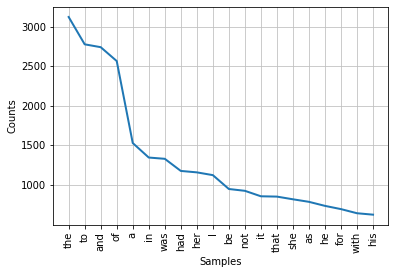

In [56]:
# 20개의 사용 빈도 그래프
from nltk import Text

text = Text(retokenize.tokenize(persuasion))

text.plot(20)